#**Prediction of Energy-Use of Appliances**
The objective is to use weather information outside and inside a house to estimate the electricity consumption that house, in those weather conditions, would demand. Therefore, all columns except appliances and the date will be considered attributes, and this column will be used as target.

#CONTENTS


1.   IMPORTING AND VISUALISATION
2.   MISSING VALUES
3.   CORRELATION
4.   TARGET COLUMN INGIGHTS
5.   EXTRACTING NEW FEATURES
6.   VISUALISATION FOR FEATURE SELECTION
7.   MODEL FITTING
8.   RESULT VISUALISATION
9.   HYPERPARAMETER TUNING
10.  CONCLUSION










.



In [ ]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import math
import time
from math import sqrt

from datetime import datetime
import dateutil
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb

!pip3 install catboost
from catboost import CatBoostRegressor as cbr
from sklearn import neighbors
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import mean_squared_error, r2_score

**1. IMPORTING.......**

In [2]:
energy_df = pd.read_csv('/content/drive/MyDrive/capstone-2  Appliances energy Prediction/data_application_energy.csv')
energy_df

date  Appliances  lights  ...  Tdewpoint        rv1        rv2
0      2016-01-11 17:00:00          60      30  ...   5.300000  13.275433  13.275433
1      2016-01-11 17:10:00          60      30  ...   5.200000  18.606195  18.606195
2      2016-01-11 17:20:00          50      30  ...   5.100000  28.642668  28.642668
3      2016-01-11 17:30:00          50      40  ...   5.000000  45.410389  45.410389
4      2016-01-11 17:40:00          60      40  ...   4.900000  10.084097  10.084097
...                    ...         ...     ...  ...        ...        ...        ...
19730  2016-05-27 17:20:00         100       0  ...  13.333333  43.096812  43.096812
19731  2016-05-27 17:30:00          90       0  ...  13.300000  49.282940  49.282940
19732  2016-05-27 17:40:00         270      10  ...  13.266667  29.199117  29.199117
19733  2016-05-27 17:50:00         420      10  ...  13.233333   6.322784   6.322784
19734  2016-05-27 18:00:00         430      10  ...  13.200000  34.118851  34.118851

[19735 rows x 29 columns]

In [3]:
#dropping energy column
energy_df =energy_df.drop(columns =['lights'], axis=1)
energy_df.shape

(19735, 28)

In [4]:
energy_df.describe()

Appliances            T1  ...           rv1           rv2
count  19735.000000  19735.000000  ...  19735.000000  19735.000000
mean      97.694958     21.686571  ...     24.988033     24.988033
std      102.524891      1.606066  ...     14.496634     14.496634
min       10.000000     16.790000  ...      0.005322      0.005322
25%       50.000000     20.760000  ...     12.497889     12.497889
50%       60.000000     21.600000  ...     24.897653     24.897653
75%      100.000000     22.600000  ...     37.583769     37.583769
max     1080.000000     26.260000  ...     49.996530     49.996530

[8 rows x 27 columns]

.



.







**2. MISSING VALUES**





.




.

In [5]:
energy_df.isnull().sum()

date           0
Appliances     0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64





.




***No missing values are present in data***




.

.

.




.


.


**3. CORRELATION**



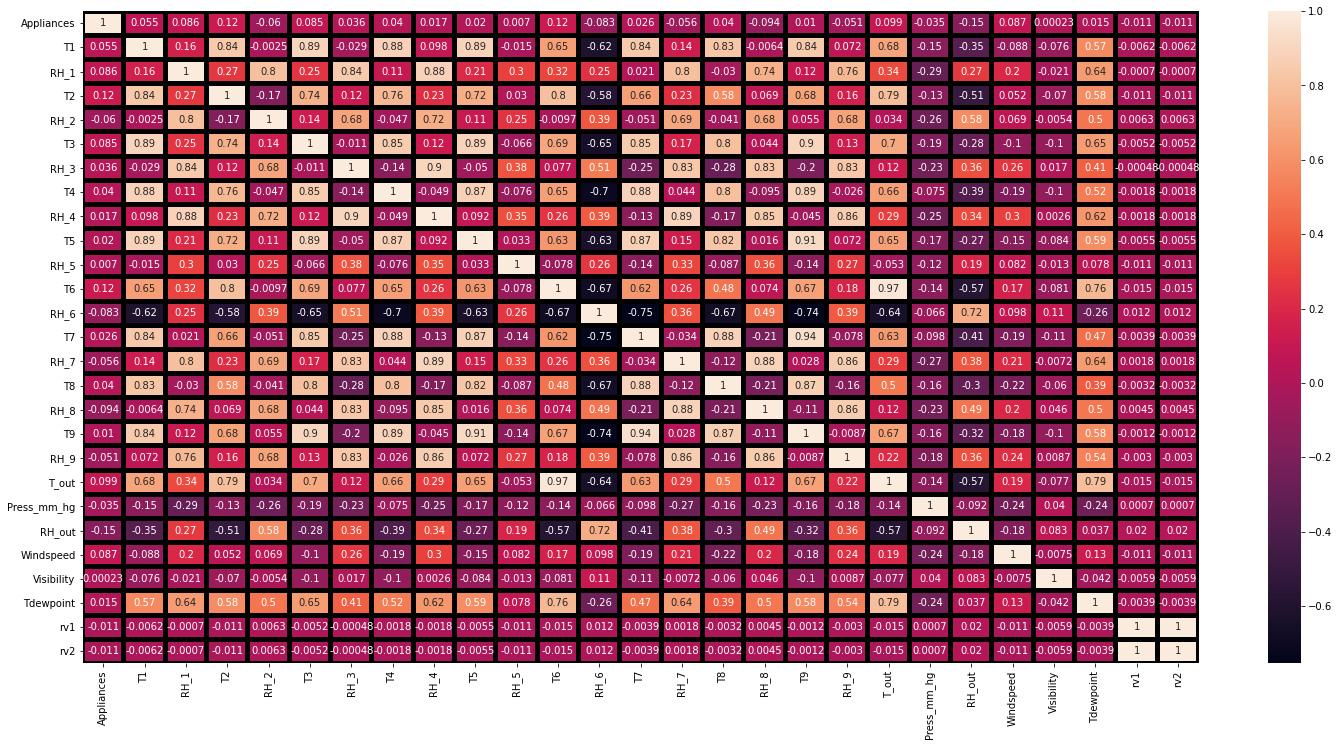

In [6]:
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(energy_df.corr(), annot = True, linewidths=4, linecolor='black')


.


.
***THERE ARE SO MANY COLUMNS WHICH ARE OF NO CONTRIBUTION TO TARGET COLUMN...LETS TAKE A DEEPER LOOK***



.


.

.






.



**4. TARGET COLUMN INSIGHTS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


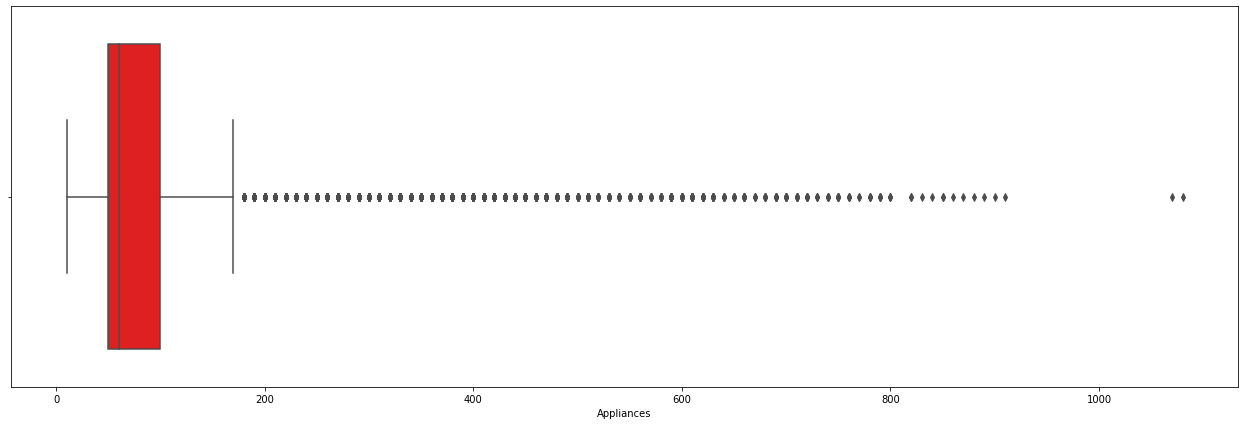

In [7]:
fig, ax = plt.subplots(figsize=(22,7))
sns.boxplot(energy_df["Appliances"],color='red')

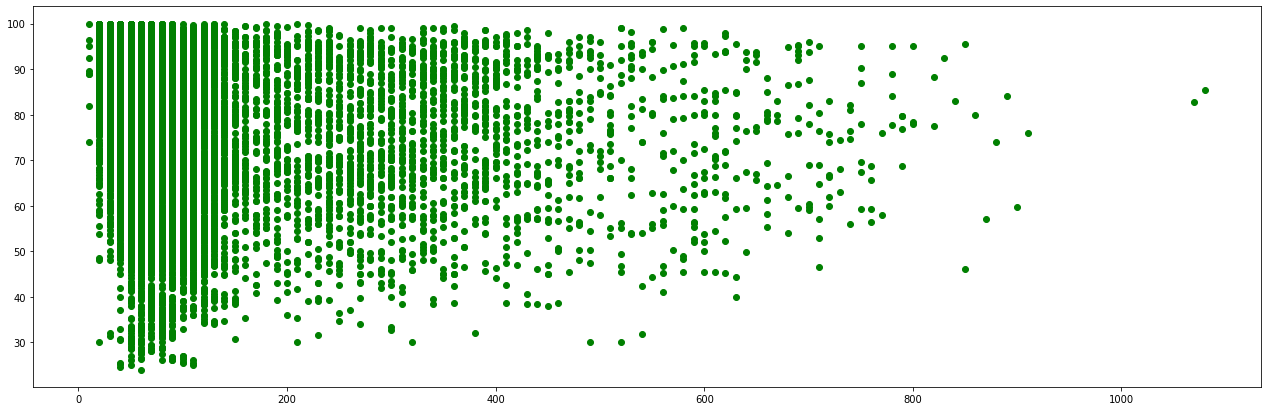

In [8]:
fig, ax = plt.subplots(figsize=(22,7))
plt.scatter(energy_df["Appliances"],energy_df["RH_out"],color='green')

.

.




***BOXPLOT AND SCATTERPLOT ABOVE SHOWS THAT THE TARGET COLUMN APPLIANCES CONTAINS OUTLIERS***

.


.

In [9]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-null  float64
 19  RH_9

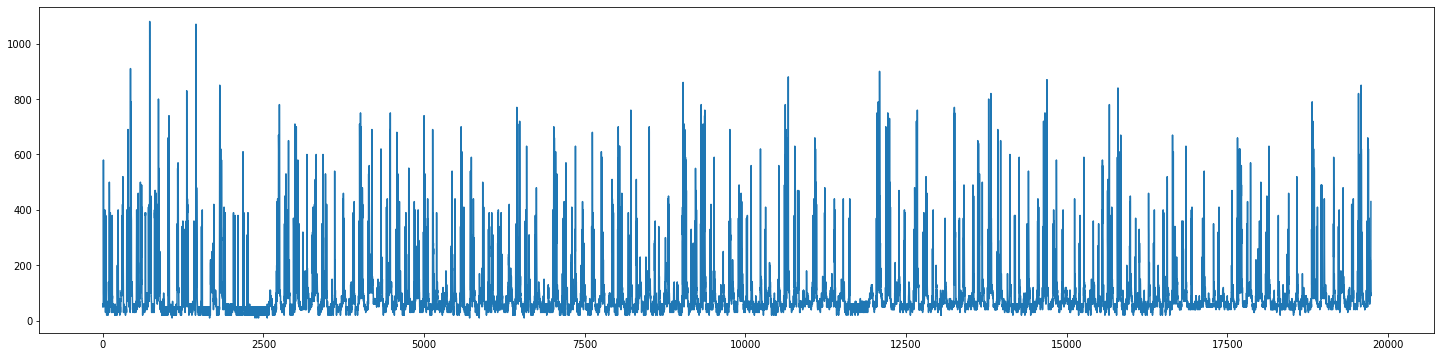

In [10]:
f,ax = plt.subplots(1, 1,figsize=(25,6))
plt.plot(energy_df['Appliances'])

.



***LOOKS LOKE THERE IS NO SEASONALITY IN APPLIANCES***



.
.

In [11]:
#it seems that rv1 and rv2 columns are same..so dropping rv2
energy_df=energy_df.drop(columns=['rv2'],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


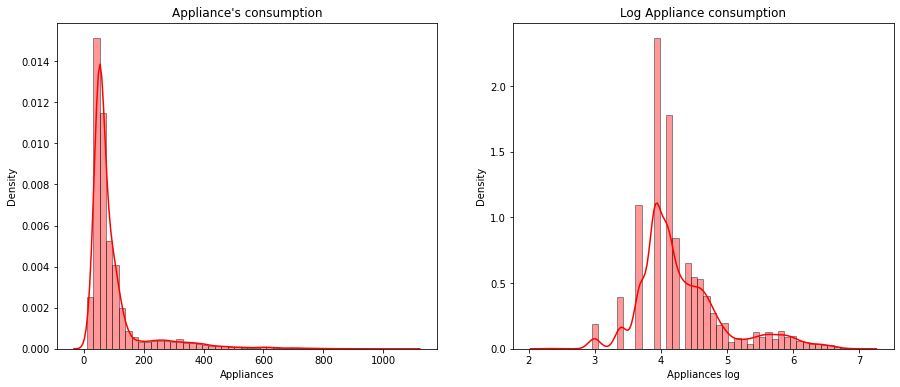

In [12]:
f,ax = plt.subplots(1, 2,figsize=(15,6))


#plotting distribution of target column appliances
sns.distplot(energy_df.Appliances, hist=True, color = 'red',hist_kws={'edgecolor':'black'},ax=ax[0])
ax[0].set_title("Appliance's consumption")
ax[0].set_xlabel('Appliances')

#ploting distribution of log of target column appliances
sns.distplot(np.log(energy_df.Appliances), hist=True, color = 'red',hist_kws={'edgecolor':'black'},ax=ax[1])
ax[1].set_title("Log Appliance consumption")
ax[1].set_xlabel('Appliances log')

energy_df['log_appliances']=np.log(energy_df['Appliances'])

***AS THERE WERE OUTLIERS PRESENT IN THE TARGET COLUMN, SO I TOOK LOG OF TARGET COLUMN APPLIANCES SO THAT WE CAN NORMALISE VALUES TO SOME EXTENT***




.




.

.

.





.


**5. EXTRACTING NEW FEATURES FROM DATE COLUMN**


In [13]:
energy_df['week_day'] = ((pd.to_datetime(energy_df['date']).dt.dayofweek)// 5 == 1).astype(float)
energy_df['date']=pd.to_datetime(energy_df["date"])

energy_df['hours']=energy_df['date'].dt.hour
energy_df['month']=energy_df['date'].dt.month
energy_df['day']=energy_df['date'].dt.day
energy_df['week_of_month']=(energy_df['date'].dt.day//7)+1

In [14]:
temperatures_of_different_rooms = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','log_appliances']
humidities_of_different_rooms = ['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7','RH_8','RH_9','log_appliances']


.



.





.





.



**6. VISUALISATION FOR FEATURE SELECTION**



> TEMPERATURES (T1-T9)




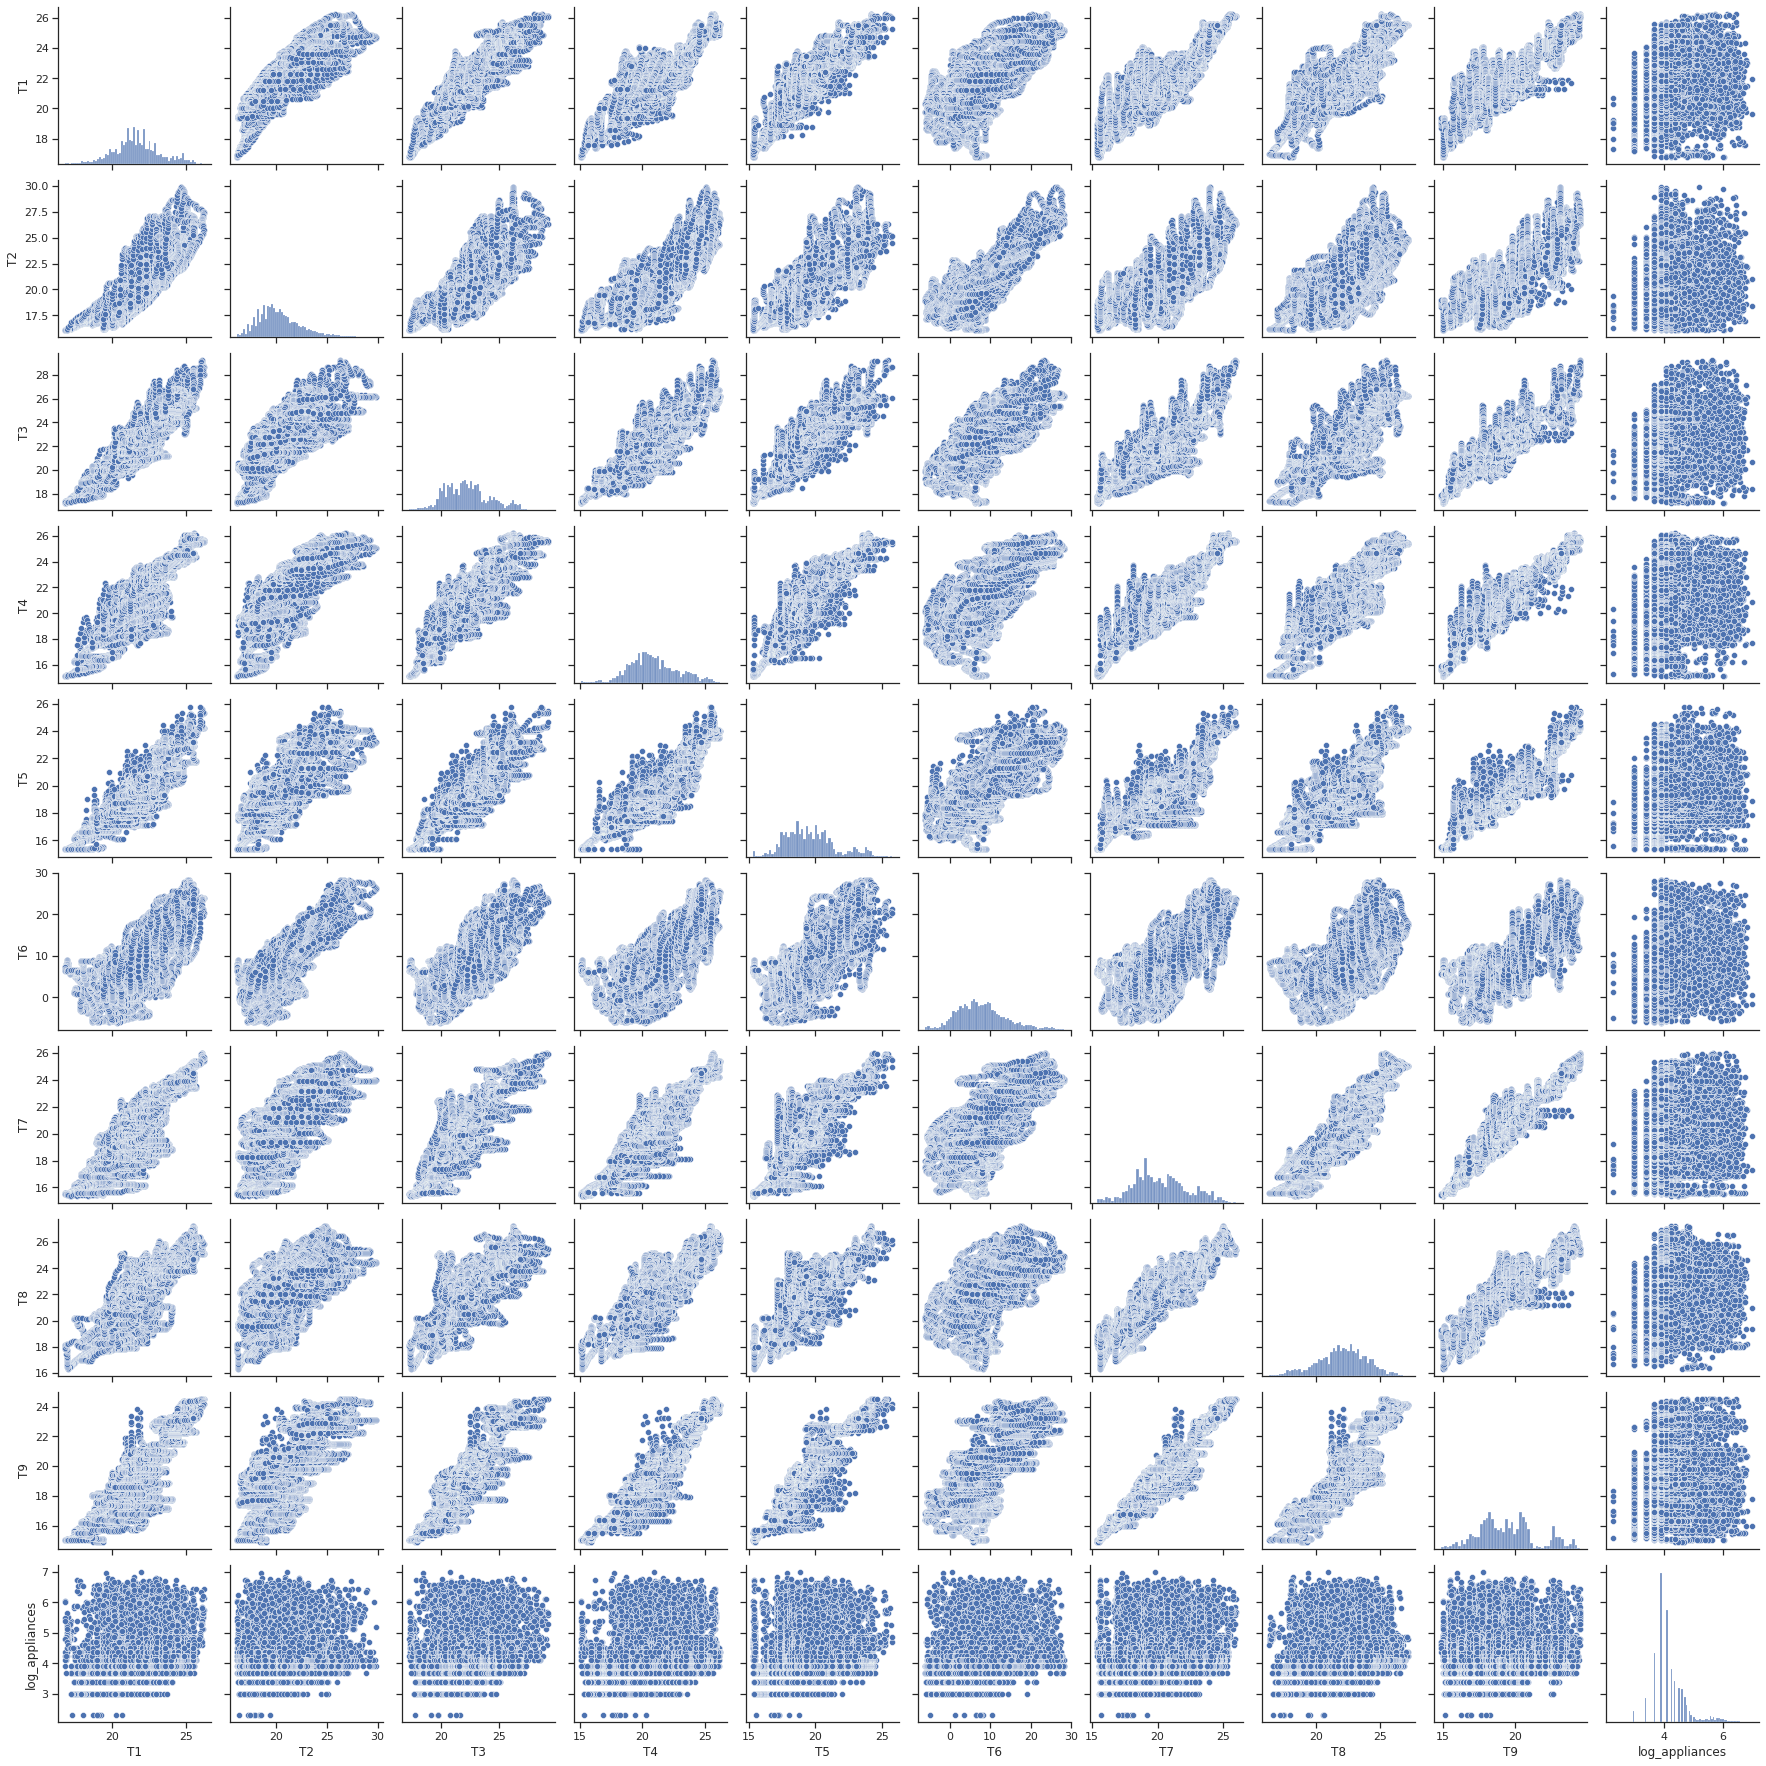

In [15]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[temperatures_of_different_rooms])
plt.show()

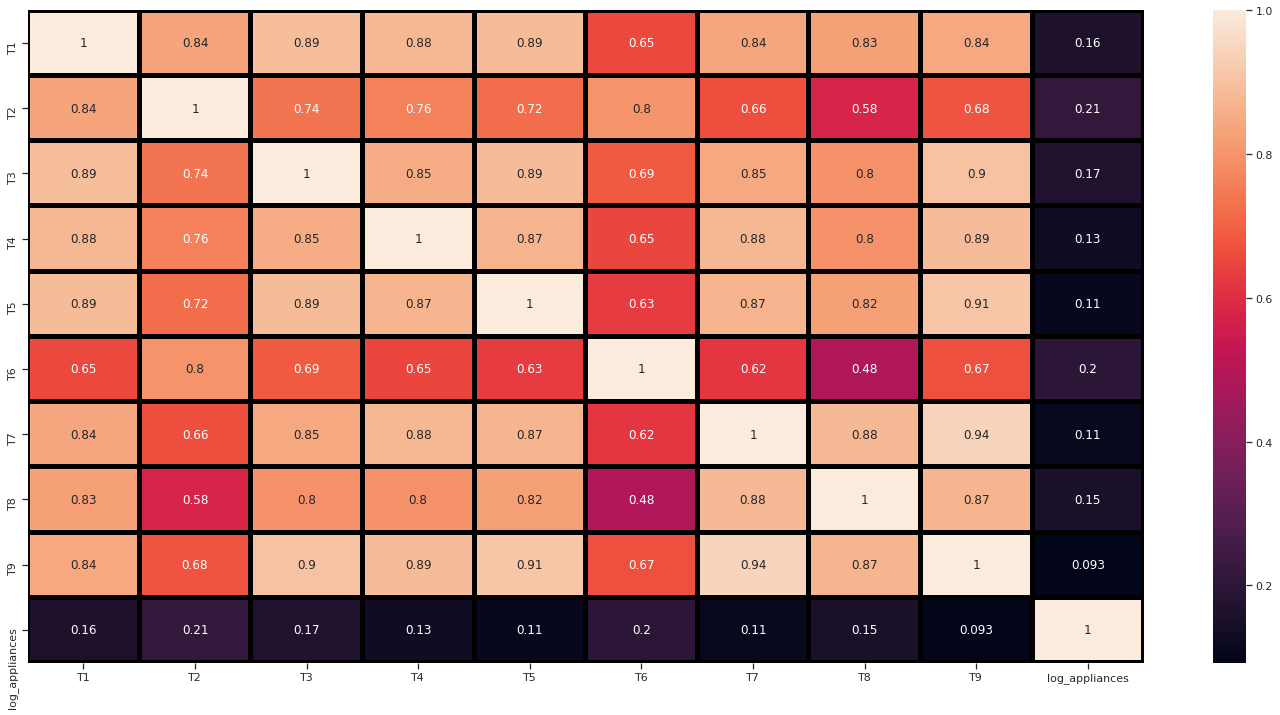

In [16]:
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(energy_df[temperatures_of_different_rooms].corr(), annot = True, linewidths=4, linecolor='black')

#OBSERVATION FROM TEMPERATURES

*   Since T9,T8, and T7 are highly correlated to each other and out of these  T8 is hihgly correlated with Appliances so we take only t8 to final model
*   Since T1,T2,T3,T4 and T5 are highly correlated to each other and out of these  T2 is hihgly correlated with Appliances so we take only t8 to final model
*   T6 is also highly correlated with appliances








In [17]:
cols_for_consideration = ['T8','T2','T3','T6']

.




.




.



> HUMIDITIES (RH_1 - RH_9)

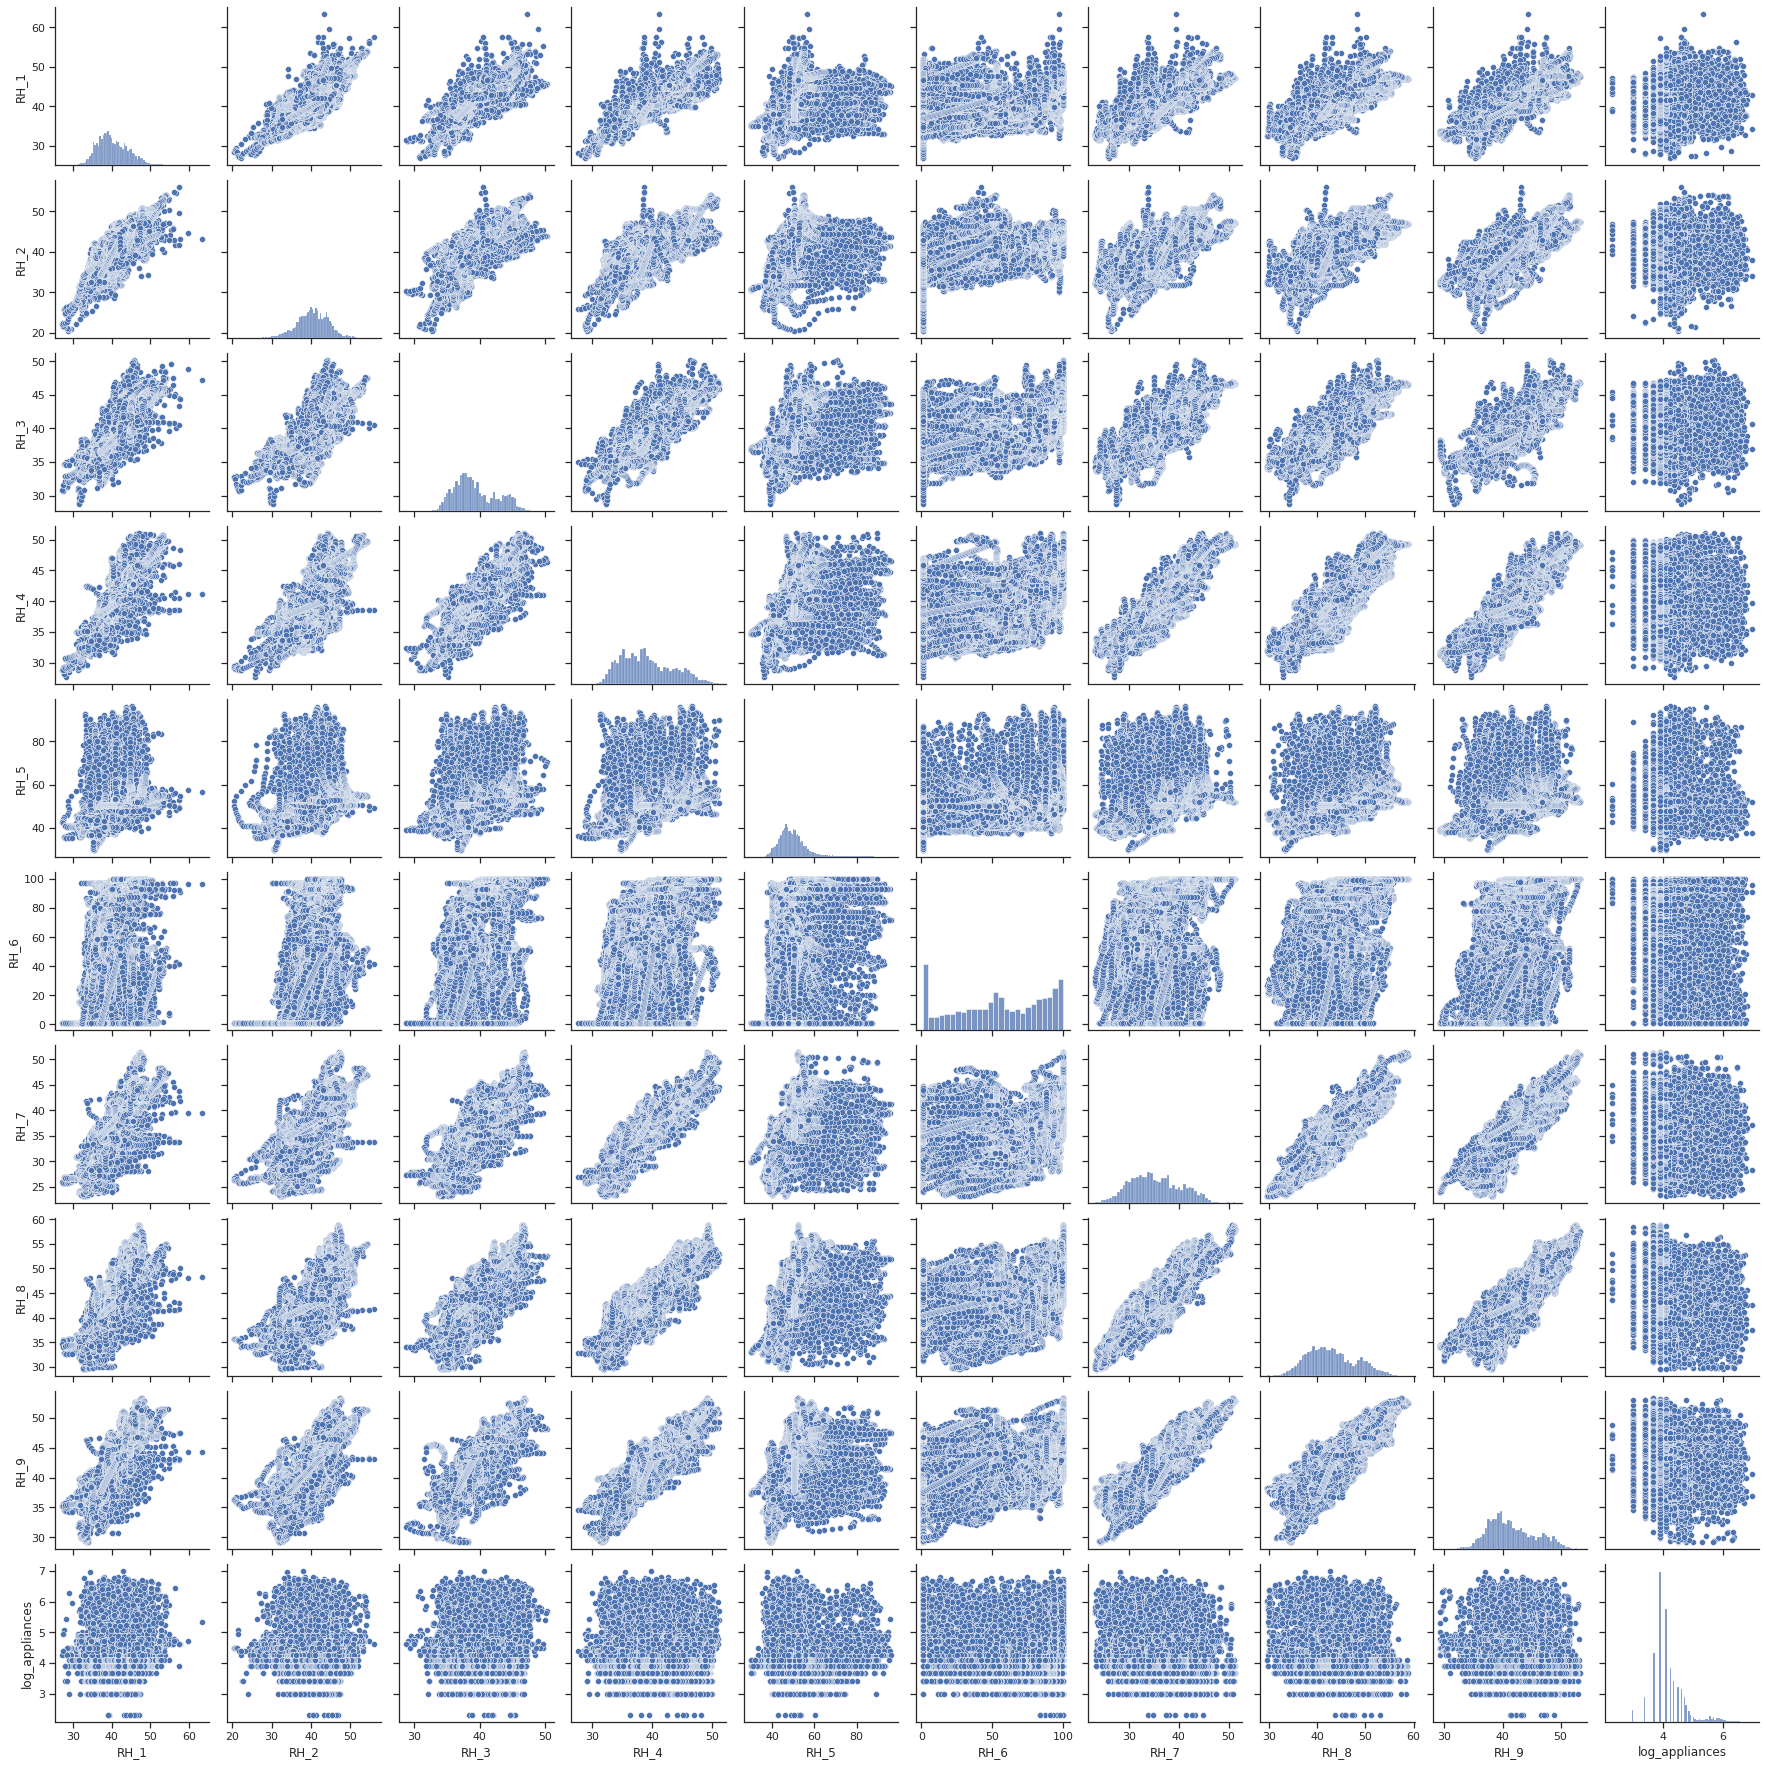

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(energy_df[humidities_of_different_rooms])
plt.show()

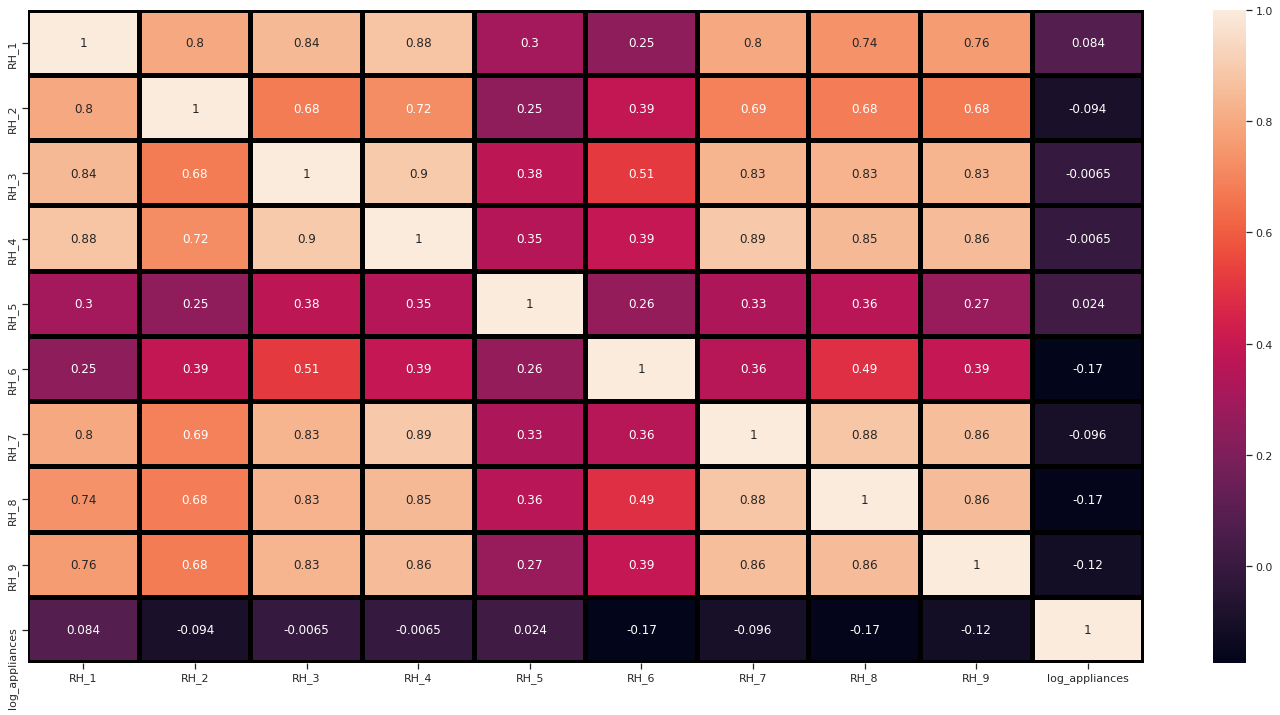

In [19]:
fig, ax = plt.subplots(figsize=(25,12))
sns.heatmap(energy_df[humidities_of_different_rooms].corr(), annot = True, linewidths=4, linecolor='black')

#OBSERVATION FROM HUMIDITIES

*   Since RH_1,RH_3,RH_4, are highly correlated to each other and out of these  RH_7 is hihgly correlated with Appliances so we take only RH_8 to final model
*  Since RH_8,RH_9 are highly correlated to each other and out of these  RH_8 is hihgly correlated with Appliances so we take only t8 to final model 


In [20]:
cols_for_consideration.append('RH_6')
cols_for_consideration.append('RH_1')
cols_for_consideration.append('RH_8')

In [21]:
other_cols = ['Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','hours','week_day','month','day','week_of_month','log_appliances']

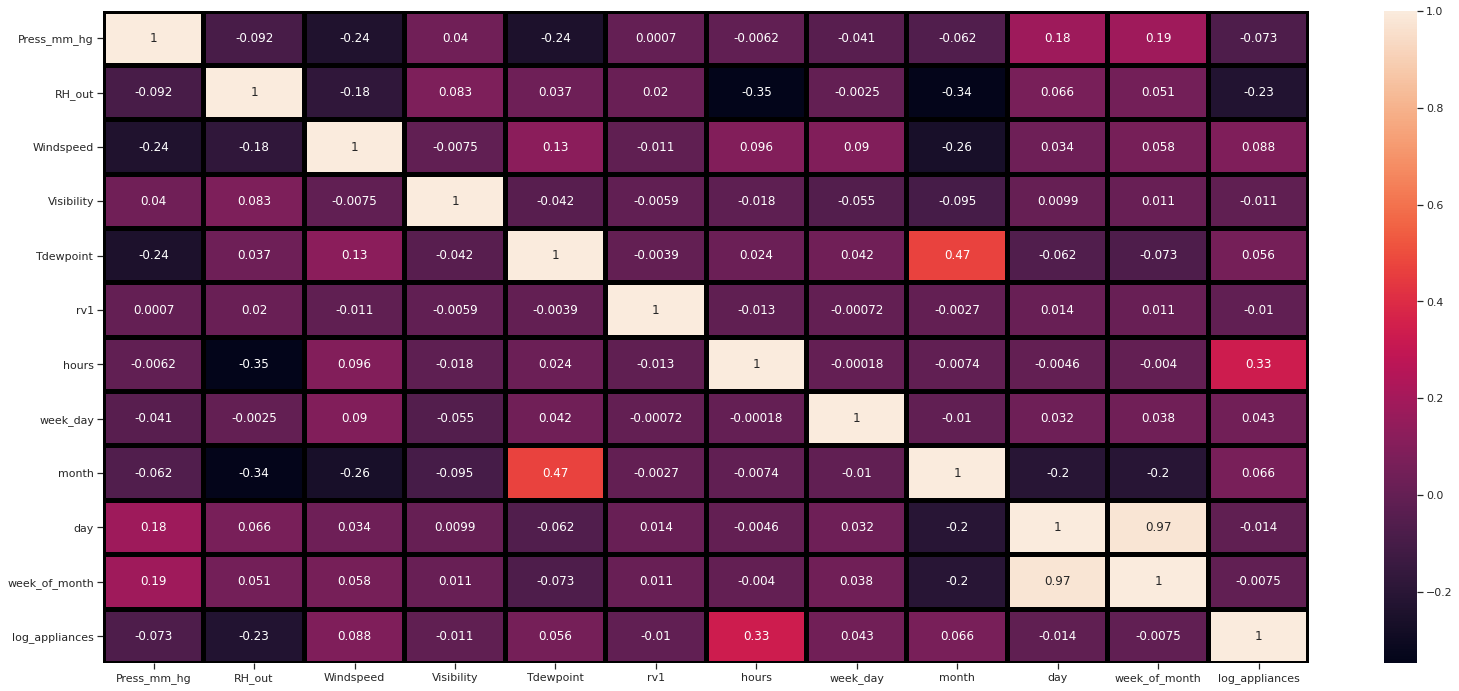

In [22]:
fig, ax = plt.subplots(figsize=(27,12))
sns.heatmap(energy_df[other_cols].corr(), annot = True, linewidths=4, linecolor='black')

 **SINCE 'Press_mm_hg, 'Visibility', 'rv1' , 'week_day' , 'day'  , week_of_month'  HAVE VARY LOW CORRELATION VALUES  WITH 'log_appliances' we are
not taking them in consideration**

In [23]:
cols_for_consideration.append('RH_out')
cols_for_consideration.append('Windspeed')
cols_for_consideration.append('hours')
cols_for_consideration.append('week_day')



In [26]:
#FINAL SET TO INDEPENDENT LABELS
cols_for_consideration

['T8',
 'T2',
 'T3',
 'T6',
 'RH_6',
 'RH_1',
 'RH_8',
 'RH_out',
 'Windspeed',
 'hours',
 'week_day']

.



.



.



SPLITTING TEST AND TRAIN SET

In [27]:
# X AND y 
X = energy_df[cols_for_consideration]
y= energy_df['log_appliances']

In [28]:
#splitting ang taking 70% values in train set and 30% in test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=32)

In [29]:
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X_train)
X = scaler.transform(X_test)

In [30]:
accuracy = []
r2_val = []
rmse_val =[]

EVALUATION METRICES

In [31]:
#function for model scored
def model_scores(model,xtest,ytest):

  #r2score
  r2 =  metrics.r2_score(ytest,model.predict(xtest))

  #root mean squared error
  rmse = sqrt(mean_squared_error(ytest,model.predict(xtest)))

  #accuracy
  acc = 100 - (100 * np.mean(abs(model.predict(xtest) - ytest)/ytest))
  print('\n\n\nfor' , model)
  print('\n\n\nr2 score is', r2)
  print('rmse score is', rmse)
  print('accuracy is', acc , '% \n\n\n')
  accuracy.append(acc)
  r2_val.append(r2)
  rmse_val.append(rmse)

.



.



.




**7. MODEL FITTING**



*   LASSO REGRESSION
*   RIDGE REGRESSION
*   K-NEAREST NEIGHBOUR
*   XGBOOST
*   SUPPORT VECTOR MACHINE
*   RANDOM FOREST
*   GRADIENT BOOSTING
*   CATBOOST REGRESSION






In [32]:
model_name =[]

LASSO REGRESSION

In [33]:

lasso = Lasso()
lasso.fit(X_train,y_train)
model_scores(lasso,X_test,y_test)
model_name.append('lasso')




for Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)



r2 score is 0.08054440283344899
rmse score is 0.6222522016337428
accuracy is 89.74150034317573 % 





RIDGE REGRESSION


In [34]:
ridge = Ridge()
ridge.fit(X_train,y_train)
model_scores(ridge,X_test,y_test)
model_name.append('ridge')




for Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)



r2 score is 0.18744205697160787
rmse score is 0.5849627770073
accuracy is 90.69427792193598 % 





K-NEAREST NEIGHBOUR

In [35]:
knn = neighbors.KNeighborsRegressor()
knn.fit(X_train,y_train)
model_scores(knn,X_test,y_test)
model_name.append('knn')




for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')



r2 score is 0.5919202406746875
rmse score is 0.4145468205959516
accuracy is 93.69706823551059 % 





XGBOOST




In [36]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)
model_scores(xgb,X_test,y_test)
model_name.append('xgb')

[23:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.



for XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)



r2 score is 0.39480156316674697
rmse score is 0.5048355852944034
accuracy is 92.242782841027 % 





SUPPORT VECTOR MACHINE


In [37]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
model_scores(svr,X_test,y_test)
model_name.append('svr')




for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)



r2 score is 0.21679106624436195
rmse score is 0.5743014036797349
accuracy is 91.76367950558539 % 





RANDOM FOREST


In [38]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
model_scores(random_forest,X_test,y_test)
model_name.append('random_forest')




for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)



r2 score is 0.6848070986346546
rmse score is 0.36432525320671666
accuracy is 94.47128335804913 % 





GRADIENT BOOSTING


In [39]:
gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train)
model_scores(gradient,X_test,y_test)
model_name.append('gradient')




for GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)



r2 score is 0.3947562188669673
rmse score is 0.5048544972627421
accuracy is 92.2356152962637 % 





CATBOOST REGRESSION

In [40]:
cat = cbr()
cat.fit(X_train, y_train)
model_scores(cat,X_test,y_test)
model_name.append('cat')

Learning rate set to 0.062284
0:	learn: 0.6487111	total: 54.3ms	remaining: 54.2s
1:	learn: 0.6396455	total: 62.8ms	remaining: 31.3s
2:	learn: 0.6309664	total: 68ms	remaining: 22.6s
3:	learn: 0.6230696	total: 73ms	remaining: 18.2s
4:	learn: 0.6146595	total: 78.2ms	remaining: 15.6s
5:	learn: 0.6075168	total: 83.5ms	remaining: 13.8s
6:	learn: 0.6013717	total: 88.8ms	remaining: 12.6s
7:	learn: 0.5952612	total: 94.1ms	remaining: 11.7s
8:	learn: 0.5898741	total: 99.4ms	remaining: 10.9s
9:	learn: 0.5854711	total: 104ms	remaining: 10.3s
10:	learn: 0.5809948	total: 110ms	remaining: 9.88s
11:	learn: 0.5768299	total: 115ms	remaining: 9.47s
12:	learn: 0.5730910	total: 120ms	remaining: 9.13s
13:	learn: 0.5694530	total: 125ms	remaining: 8.82s
14:	learn: 0.5666931	total: 131ms	remaining: 8.57s
15:	learn: 0.5634579	total: 136ms	remaining: 8.34s
16:	learn: 0.5607331	total: 146ms	remaining: 8.45s
17:	learn: 0.5578810	total: 151ms	remaining: 8.25s
18:	learn: 0.5558288	total: 156ms	remaining: 8.05s
19:	le

**8. RESULT VISUALISATION**

In [41]:
#CONVERTING EVALUATION METRICES TO DATAFRAME
eval = pd.DataFrame({'model_name' : model_name,
                                'accuracy' : accuracy,
                                'r2_val' : r2_val , 
                                'rmse_val' : rmse_val})
eval

model_name   accuracy    r2_val  rmse_val
0          lasso  89.741500  0.080544  0.622252
1          ridge  90.694278  0.187442  0.584963
2            knn  93.697068  0.591920  0.414547
3            xgb  92.242783  0.394802  0.504836
4            svr  91.763680  0.216791  0.574301
5  random_forest  94.471283  0.684807  0.364325
6       gradient  92.235615  0.394756  0.504854
7            cat  93.607803  0.598229  0.411330

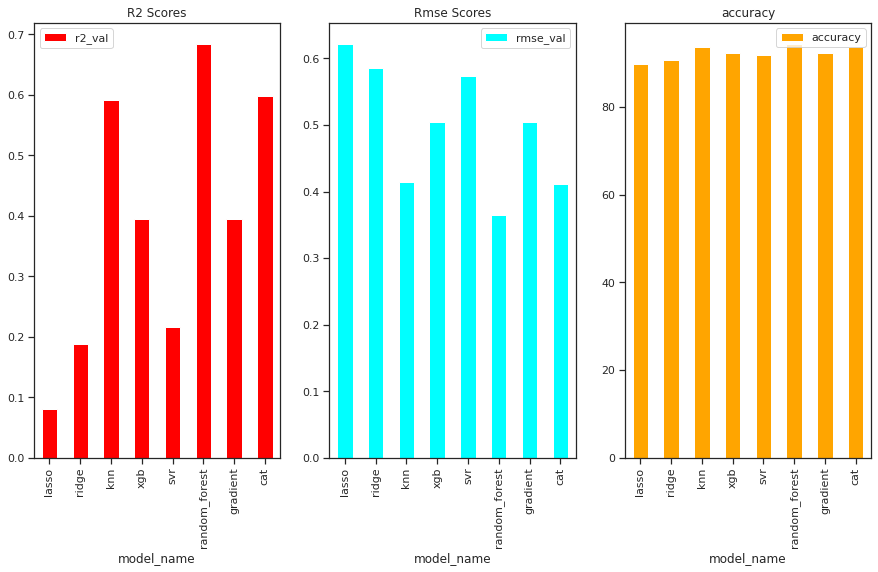

In [42]:
#PLOTTING R2 SCORES, RMSE AND ACCURACIES
fig,ax=plt.subplots(1,3, figsize=(15,8))
eval.plot(x='model_name', y='r2_val', kind="bar" , title = 'R2 Scores' ,ax=ax[0],color='red')
eval.plot(x='model_name', y='rmse_val', kind="bar" , title = 'Rmse Scores' ,ax=ax[1],color='cyan')
eval.plot(x='model_name', y='accuracy', kind="bar" , title = 'accuracy' ,ax=ax[2],color='orange')

**RANDOM FOREST HAS BEST ACCURACY, HIGHEST R2 SCORE AND LOWEST ROOT MEAN SQUARED ERROR**

Text(0.5, 1.0, 'actual vs predicted')

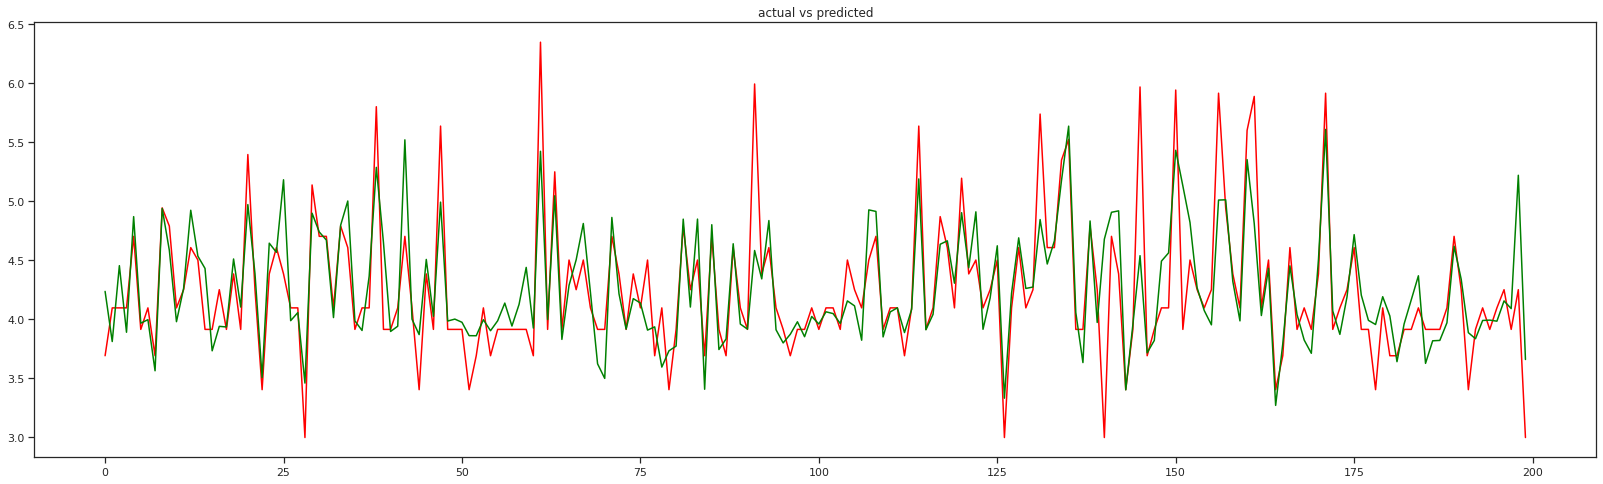

In [43]:
#PLOTTING ACTUAL LABESL AND PREDICTED ONES
fig = plt.figure(figsize=(28,8))
plt.plot(y_test[:200].values,label='actual value',color='red')
plt.plot(random_forest.predict(X_test)[:200],label='pred(random forest)', color='green')
plt.title('actual vs predicted')

.




**9. HYPERMARAMETER TUNING**







.



In [44]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [45]:

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [47]:
# R2 score on test set with tuned parameters
rf_random.score(X_test,y_test)

# RMSE score on test set with tuned parameters

rmse = np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))
acc = 100 - (100 * np.mean(abs(rf_random.predict(X_test) - y_test)/y_test))
r2=metrics.r2_score(y_test,rf_random.predict(X_test))
print('\n\n\n********')
print('accuracy is',acc)
print('rmse is',rmse)
print('r2 is',r2)
print('**********\n\n\n')




********
accuracy is 94.72407436424632
rmse is 0.34988805775803183
r2 is 0.7092925803781721
**********





In [48]:
name=['random_forest','random_foresst_after_tuning']
r2s=[metrics.r2_score(y_test,random_forest.predict(X_test)) , metrics.r2_score(y_test,rf_random.predict(X_test))]
accs=[100 - (100 * np.mean(abs(random_forest.predict(X_test) - y_test)/y_test)) , 100 - (100 * np.mean(abs(rf_random.predict(X_test) - y_test)/y_test))]
rms = [np.sqrt(mean_squared_error(y_test, random_forest.predict(X_test))) , np.sqrt(mean_squared_error(y_test, rf_random.predict(X_test)))]
df=pd.DataFrame({'NAME OF MODEL':name , 'R2 SCORES':r2s , 'ACCURACIES':accs , 'RMSE':rms})

In [49]:
df

NAME OF MODEL  R2 SCORES  ACCURACIES      RMSE
0                random_forest   0.684807   94.471283  0.364325
1  random_foresst_after_tuning   0.709293   94.724074  0.349888

**AFTER HYPERMATER TUNING RANDOM FOREST GAVE BETTER RESULTS**

.



.



.

**10. CONCLUSION**
* RANDOM FOREST GAVE BEST RESULTS
* CATBOOST REGRESSOR WAS SECOND BEST MODEL'
* MAXIMUM ACCURACY ACHIVED WAS 94.79